In [57]:
from math import floor

import pandas as pd

In [58]:
# read xlsx file into pandas data frame
dataframe = pd.read_excel("data/IMDB_movies_data.xlsx")

In [59]:
# print out the df
dataframe 

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [60]:
def find_invalid_release(df):
    valid_years = (0,2024) 
    # convert string values to numeric in the column
    df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors='coerce')
    # create df with only valid rows
    valid = df[(df['Released_Year'] > valid_years[0]) & (df['Released_Year'] <= valid_years[1])]
    
    if valid.shape[0] != df.shape[0]:
        print("Number of invalid released years: ", df.shape[0] - valid.shape[0])
        return valid
    else:
        print("No invalid released year found.")    

In [61]:
def find_invalid_runtime(df):
    # convert string column to numeric by removing the min abbreviation
    df["Runtime"] = pd.to_numeric(df["Runtime"].str.replace(' min', ''), errors='coerce')
    # find only rows with runtime greater then 0
    valid = df[(df["Runtime"] > 0)]
    
    if valid.shape[0] != df.shape[0]:
        print("Number of invalid runtime: ", df.shape[0] - valid.shape[0])
        return valid
    else:
        print("No invalid runtime found.")

    

In [62]:
def find_empty_rows(df):
    # get rows in which all the columns are not empty
    valid = df.dropna(how='any')
    
    if valid.shape[0] != df.shape[0]:
        print("Number of empty rows with at least one empty column:", df.shape[0] - valid.shape[0])
        return valid
    else:
        print("All rows are complete.")

In [63]:
def find_duplicate_rows(df):
    print("Number of duplicate rows found: ", df.duplicated().sum())
    df.drop_duplicates()

In [64]:
find_duplicate_rows(dataframe)

years_result = find_invalid_release(dataframe)
if years_result is not None:
    dataframe = years_result
    
runtime_result = find_invalid_runtime(dataframe)
if runtime_result is not None:
    dataframe = runtime_result
    
empty_rows_result = find_empty_rows(dataframe)
if empty_rows_result is not None:
    dataframe = empty_rows_result
    

Number of duplicate rows found:  0
Number of invalid released years:  1
No invalid runtime found.
Number of empty rows with at least one empty column: 286


/var/folders/5w/cdql6gcx42d6fnqq17_q_q9c0000gn/T/ipykernel_10704/2676420931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Runtime"] = pd.to_numeric(df["Runtime"].str.replace(' min', ''), errors='coerce')


In [65]:
dataframe

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971.0,PG,157,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696.69
991,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970.0,GP,144,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435"
992,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967.0,U,78,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612"
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964.0,U,87,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024"


In [66]:
import matplotlib.pyplot as plt

/var/folders/5w/cdql6gcx42d6fnqq17_q_q9c0000gn/T/ipykernel_10704/2192858179.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Rating_Range'] = pd.cut(dataframe['IMDB_Rating'], bins=bins, labels=labels, include_lowest=True)


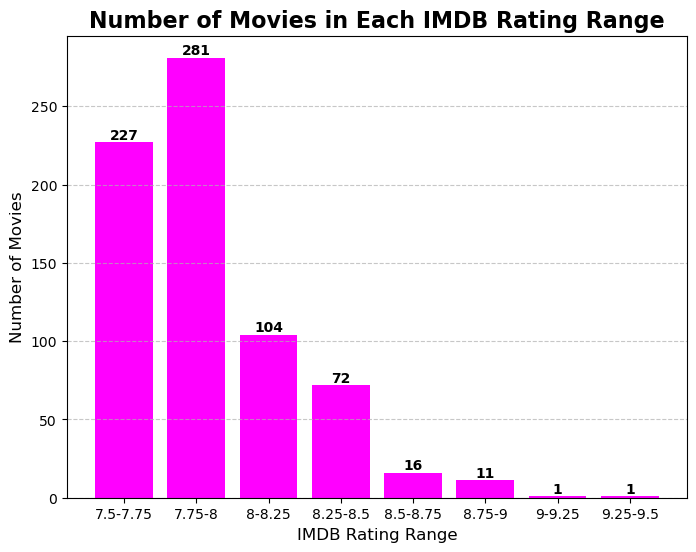

In [67]:
bins = [7.5, 7.75, 8, 8.25, 8.5, 8.75, 9, 9.25, 9.5]
labels = ['7.5-7.75', '7.75-8', '8-8.25', '8.25-8.5', '8.5-8.75', '8.75-9', '9-9.25', '9.25-9.5']

# add to df additional column rating range to determine in which range is particular movie
dataframe['Rating_Range'] = pd.cut(dataframe['IMDB_Rating'], bins=bins, labels=labels, include_lowest=True)

# count the number of movies in each range
rating_counts = dataframe['Rating_Range'].value_counts().sort_index()

# create the bar plot
plt.figure(figsize=(8, 6))
bars = plt.bar(rating_counts.index, rating_counts.values, color='magenta')
plt.title('Number of Movies in Each IMDB Rating Range', fontsize=16, fontweight='bold')
plt.xlabel('IMDB Rating Range', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the count on top of each bar
for bar in bars:
    value = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, value, int(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.show()

Certificate
U           182
A           174
UA          142
R           131
PG-13        38
PG           19
G             9
Passed        9
Approved      6
TV-PG         1
U/A           1
GP            1
Name: count, dtype: int64


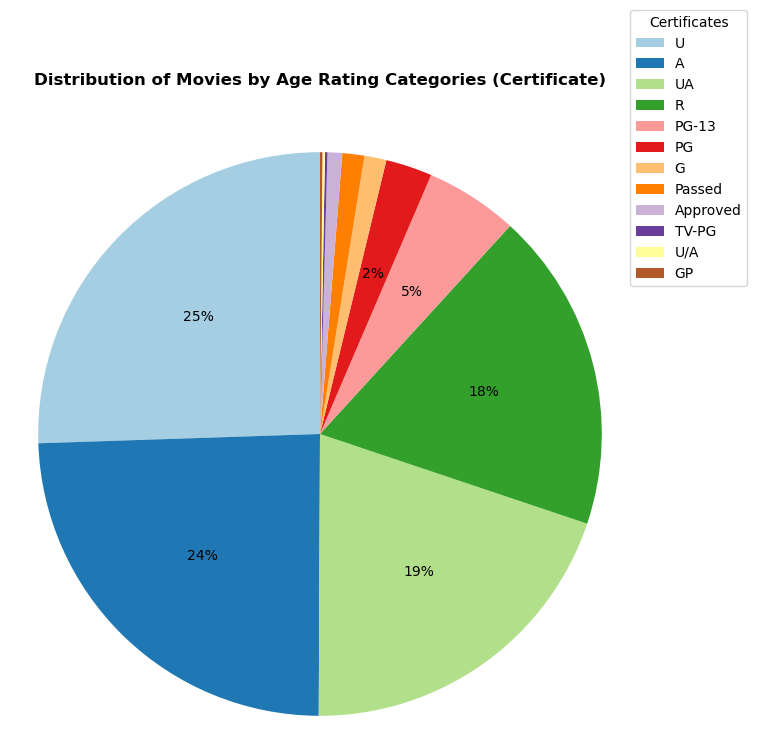

In [68]:
import matplotlib.pyplot as plt

certs_count = dataframe['Certificate'].value_counts()

print(certs_count)

percents = certs_count / certs_count.sum() * 100

def label(percent):
    if percent > 2:
        return str(int(percent)) + '%'
    else:
        return ""

plt.figure(figsize=(8, 8))
plt.pie(certs_count, 
        autopct=label,  
        startangle=90, 
        colors=plt.cm.Paired.colors)

plt.title('Distribution of Movies by Age Rating Categories (Certificate)', fontsize=12, fontweight='bold', pad=30)

plt.legend(certs_count.index, 
           title='Certificates', 
           loc='upper right', 
           bbox_to_anchor=(1.2, 1.2))

plt.axis('equal')
plt.show()


In [70]:
dataframe

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Rating_Range
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",9.25-9.5
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",9-9.25
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",8.75-9
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000",8.75-9
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000",8.75-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,https://m.media-amazon.com/images/M/MV5BYjRmY2...,Giù la testa,1971.0,PG,157,"Drama, War, Western",7.6,A low-life bandit and an I.R.A. explosives exp...,77.0,Sergio Leone,Rod Steiger,James Coburn,Romolo Valli,Maria Monti,30144,696.69,7.5-7.75
991,https://m.media-amazon.com/images/M/MV5BMzAyND...,Kelly's Heroes,1970.0,GP,144,"Adventure, Comedy, War",7.6,A group of U.S. soldiers sneaks across enemy l...,50.0,Brian G. Hutton,Clint Eastwood,Telly Savalas,Don Rickles,Carroll O'Connor,45338,"1,378,435",7.5-7.75
992,https://m.media-amazon.com/images/M/MV5BMjAwMT...,The Jungle Book,1967.0,U,78,"Animation, Adventure, Family",7.6,Bagheera the Panther and Baloo the Bear have a...,65.0,Wolfgang Reitherman,Phil Harris,Sebastian Cabot,Louis Prima,Bruce Reitherman,166409,"141,843,612",7.5-7.75
994,https://m.media-amazon.com/images/M/MV5BZjQyMG...,A Hard Day's Night,1964.0,U,87,"Comedy, Music, Musical",7.6,"Over two ""typical"" days in the life of The Bea...",96.0,Richard Lester,John Lennon,Paul McCartney,George Harrison,Ringo Starr,40351,"13,780,024",7.5-7.75


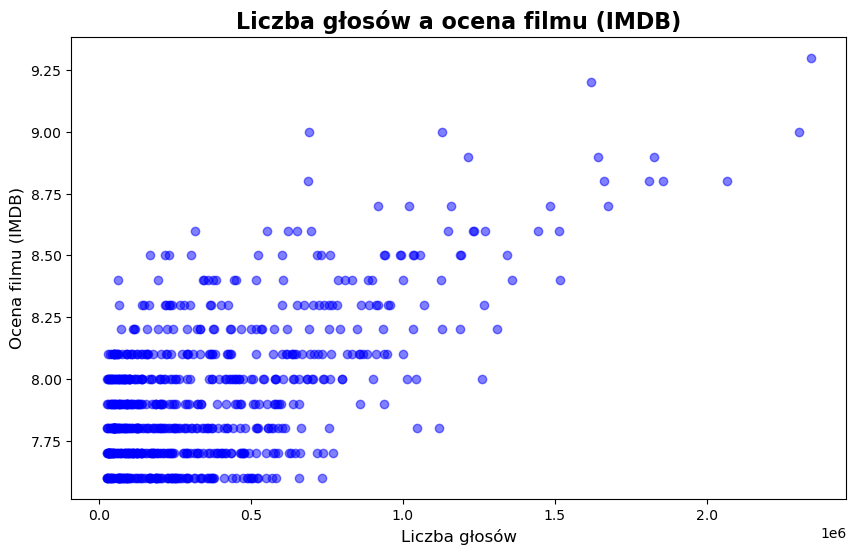

In [72]:
import matplotlib.pyplot as plt


votes = dataframe['No_of_Votes']
ratings = dataframe['IMDB_Rating']

plt.figure(figsize=(10, 6))
plt.scatter(votes, ratings, alpha=0.5, color='blue')

plt.title('Liczba głosów a ocena filmu (IMDB)', fontsize=16, fontweight='bold')
plt.xlabel('Liczba głosów', fontsize=12)
plt.ylabel('Ocena filmu (IMDB)', fontsize=12)

plt.show()